Task 1 (10 Marks): Import the adult dataset from the ucimlrepo. Check the IMPORT IN
PYTHON option provided by UCI for instructions on how to do so:
Note that at no point in this assignment, should you save the dataset locally to your machine.
Doing so will result in zero marks for this assignment.

In [ ]:
pip install ucimlrepo

In [2]:
import ssl
import urllib.request

# Create an unverified SSL context
ssl._create_default_https_context = ssl._create_unverified_context

# Now, any urllib request will not perform SSL certificate verification
response = urllib.request.urlopen('https://archive.ics.uci.edu')
data = response.read() 

#SSL included to fix error caused by the api having an expired sll cert 

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [3]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [5]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Task 2 (10 Marks): Take a quick look at the data structure (i.e., X) using .head(), .info(),
.describe(), and .shape.

In [6]:
X.shape

(48842, 14)

Task 2.1: Plot a histogram of the data.

<Axes: ylabel='Frequency'>

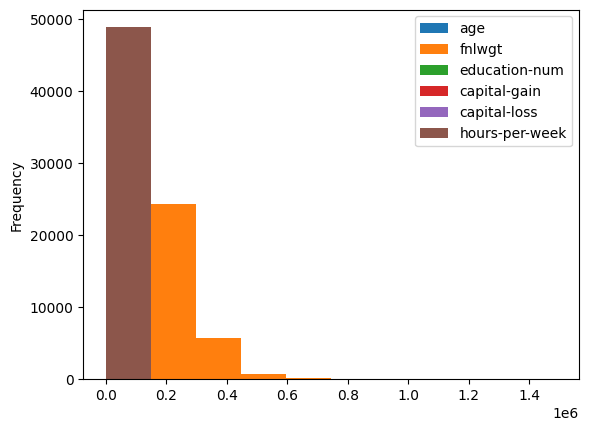

In [11]:
#2.1
X.plot.hist()

In [ ]:
Task 3 (10 Marks): There are missing values in this dataset that are entered as ?, check for the
number of these missing values.

In [12]:
#3
(X == "?").sum().sum()

4262

Task 4 (10 Marks): Replace the missing values you found in the previous step with null (nan).
Run a X.info() to see the non-null count.

In [13]:
#4
import numpy as np
X.replace("?", np.nan, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


C:\Users\mjhey\AppData\Local\Temp\ipykernel_7044\2282175454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", np.nan, inplace=True)


Task 5 (10 Marks): Create and apply a preprocessing pipeline to:
1. Fill in the missing numerical values with the mean using a SimpleImputer.
2. Scale the numerical columns using StandardScaler. Do not scale the target.
3. Fill in the missing categorical values with the most_frequent value using
SimpleImputer.
4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
- Display your pipeline.
- Print X_prepared.shape

In [15]:
#5
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical = X.select_dtypes(include='number').keys()
categorical = X.select_dtypes(include='object').keys()

t1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]) # 5.1, 5.2

t2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(sparse_output=False))]) #5.3, 5.4

preprocessing_pipeline = ColumnTransformer(transformers=[('num', t1, numerical), ('cat', t2, categorical)])

X_prepared = preprocessing_pipeline.fit_transform(X)

X_prepared.shape

(48842, 105)

Task 6 (10 Marks): Check the target value_counts. You will notice that the target needs
some data cleaning.

In [16]:
#6
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Task 7(10 Marks):: Remove the period at the end of the >50K. and <=50K. i.e., replace all instances
that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K
Run the value_counts again.

In [17]:
#7
y.replace("<=50K.", "<=50K", inplace=True)
y.replace(">50K.", ">50K", inplace=True)
y.value_counts()

C:\Users\mjhey\AppData\Local\Temp\ipykernel_7044\427411490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace("<=50K.", "<=50K", inplace=True)
C:\Users\mjhey\AppData\Local\Temp\ipykernel_7044\427411490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(">50K.", ">50K", inplace=True)


income
<=50K     37155
>50K      11687
Name: count, dtype: int64

Task 8 (10 Marks): Split the data into 80% training set and 20% testing set, print the shape of
X_train, X_test, y_train, y_test in one command.

In [18]:
#8
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=13)

print(f"{X_train.shape}{X_test.shape}{y_train.shape}{y_test.shape}")


(39073, 105)(9769, 105)(39073, 1)(9769, 1)


Task 9 (10 Marks): Train a svm model (svc) to predict if the income of the adult exceeds 50K
on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model
model_svm.

In [25]:
#9
from sklearn.svm import SVC

model_svm = SVC(kernel='poly', gamma=1, C=0.1)

model_svm.fit(X_train[:10000], y_train[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

Task 9.1: Test your model on the X_Test, and report the classification_report on the
y_test and y_predict.

In [35]:
#9.1
from sklearn.metrics import classification_report

y_predict = model_svm.predict(X_test[:10000])

classification_report = classification_report(y_train[:1000], y_predict[:1000])
print(classification_report)

              precision    recall  f1-score   support

       <=50K       0.77      0.76      0.77       766
        >50K       0.25      0.26      0.26       234

    accuracy                           0.65      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.65      0.65      0.65      1000



Task 9.2: Display the confusion matrix of your test results using
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

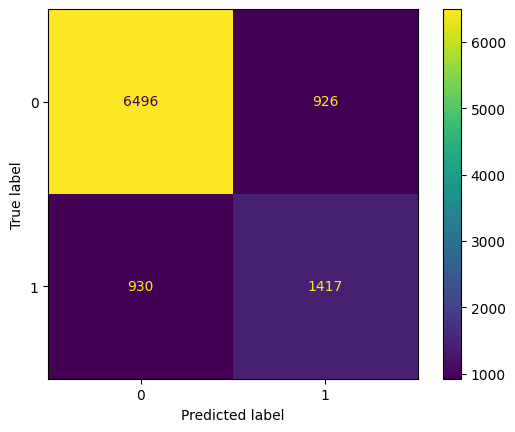

In [36]:
#9.2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusionmatrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusionmatrix)
disp.plot()


Task 10 (10 Marks): Use GridSearchCV to find the best value of kernel, gamma, and C.
Task 10.1: Split the dataset into 60% training, 20% validation, and 20% testing. Use the code
below to perform the split:

In [38]:
#10.1
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size = 0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size = 0.5, random_state=42)
print(f"{X_train.shape}{y_train.shape}{X_validation.shape}{y_validation.shape}{X_test.shape}{y_test.shape}")

(29305, 105)(29305, 1)(9768, 105)(9768, 1)(9769, 105)(9769, 1)


Task 10.2: Use the below code snippet to pass the following hyperparameters for the
GridSearchCV to find the best ones. Check the svm winner parameters using svm_winner

In [39]:
#10.2
from sklearn.model_selection import GridSearchCV

svm_params = {
    "kernel":['rbf'],
    "C": [0.01,0.1,1,10],
    "gamma":[0.1,1,10]
}

svm = SVC()
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_params)
svm_gs.fit(X_train[:10000], y_train[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.8490990990990991